# Sonia
Columna a describir: __Pais (Q3)__

Pregunta a responder: __¿Cuál es el lenguaje de programación más utilizado (Q7)?__

## Codigo limpio

### Librerias necesarias

In [54]:
# importamos las librerias necesarias para la utilizacion de sus metodos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import pycountry_convert as pc   # para crear la columna de continente
from wordcloud import WordCloud   # para la nube de palabras
import sidetable as stb

pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Funcion para limpiar columna pais y sacar solo los continentes

In [55]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return country_name

### Importamos dataframe Mundial a utilizar creado 14-01-2023

In [56]:
df_glo=pd.read_csv('../files/df_depurado.csv',index_col=0)
df_glo.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,language_q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,role_q5_def,annual_incom€_q25
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",Asia,Man,NaN,"23,250-27,899"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",Asia,Man,Supervising role,"55,800-65,099"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",0-999,Asia,Man,Sofware-related role,"0-929,07"


In [57]:
df_glo.shape

(16038, 14)

In [58]:
df_continent_a=df_glo.drop(df_glo[df_glo['continent']=='I do not wish to disclose my location'].index,axis=0, inplace=False)
df_continent_a['continent'].unique()

array(['Asia', 'North America', 'Oceania', 'Africa', 'Europe',
       'South America', 'Other'], dtype=object)

In [59]:
df_continent_frec=pd.DataFrame(df_continent_a['continent'].value_counts())
df_continent_frec

,continent
Asia,7158
Europe,3164
North America,2315
Africa,1260
South America,1066
Other,852
Oceania,201


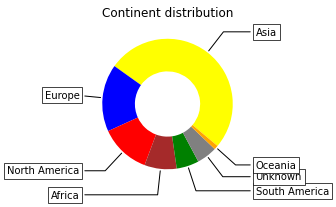

In [6]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

continent_frec=[13126,4273,3197,2044,1424,1293,261]
continent_labels=['Asia','Europe','North America','Africa','South America','Unknown','Oceania']

recipe = continent_labels
data = continent_frec

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=['yellow','blue','red','brown','green','grey','orange'])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Continent distribution")
#plt.savefig('../graphs/sonia_continent_donut.png')
plt.show()
#He intentado poner los porcentajes tambien pero desaparecian las etiquetas. Podria seguir investigando.

In [109]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

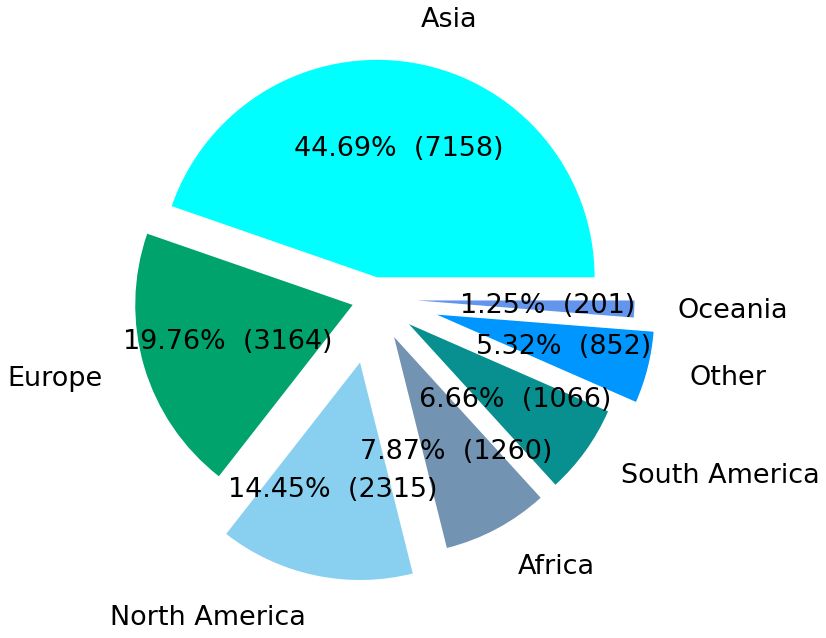

In [88]:
plt.figure(figsize=(15,10))
plt.pie(df_continent_frec['continent'],labels=df_continent_frec.index, labeldistance=1.2, explode=(0.1,0.1,0.3,0.2,0.2,0.3,0.2),textprops={'fontsize': 27},autopct=make_autopct(df_continent_frec['continent']),colors=['#00FFFF', '#00A36C', '#89CFF0','#7393B3','#088F8F','#0096FF','#6495ED'])
#plt.savefig('../graphs/sonia_continent_pie_sep.png')
plt.show()

### Creacion nube palabras lenguaje programacion más utilizado

In [9]:
df_glo.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'language_q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'role_q5_def',
       'annual_incom€_q25'],
      dtype='object')

In [10]:
df_glo_lang=df_glo.copy()

#### Creamos dataframe con una columna para cada lenguaje de programacion

In [11]:
df_glo_lang['python']=np.where(df_glo_lang['language_q7'].str.contains('Python',case=False, regex=True),1,0)
df_glo_lang['r']=np.where(df_glo_lang['language_q7'].str.contains('R',case=False, regex=True),1,0)
df_glo_lang['sql']=np.where(df_glo_lang['language_q7'].str.contains('SQL',case=False, regex=True),1,0)
df_glo_lang['c']=np.where(df_glo_lang['language_q7'].str.contains('C',case=False, regex=True),1,0)
df_glo_lang['c++']=np.where(df_glo_lang['language_q7'].str.contains('C\+\+',case=False, regex=True),1,0)
df_glo_lang['java']=np.where(df_glo_lang['language_q7'].str.contains('java',case=False, regex=True),1,0)
df_glo_lang['javascript']=np.where(df_glo_lang['language_q7'].str.contains('javascript',case=False, regex=True),1,0)
df_glo_lang['julia']=np.where(df_glo_lang['language_q7'].str.contains('julia',case=False, regex=True),1,0)
df_glo_lang['swift']=np.where(df_glo_lang['language_q7'].str.contains('swift',case=False, regex=True),1,0)
df_glo_lang['bash']=np.where(df_glo_lang['language_q7'].str.contains('bash',case=False, regex=True),1,0)
df_glo_lang['matlab']=np.where(df_glo_lang['language_q7'].str.contains('matlab',case=False, regex=True),1,0)
df_glo_lang['none']=np.where(df_glo_lang['language_q7'].str.contains('none',case=False, regex=True),1,0)
df_glo_lang['other']=np.where(df_glo_lang['language_q7'].str.contains('other',case=False, regex=True),1,0)



In [12]:
df_glo_lang.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,language_q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,role_q5_def,annual_incom€_q25,python,r,sql,c,c++,java,javascript,julia,swift,bash,matlab,none,other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",Asia,Man,NaN,"23,250-27,899",1,1,0,0,0,0,0,0,0,0,0,0,0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",Asia,Man,Supervising role,"55,800-65,099",0,0,1,1,1,1,0,0,0,0,0,0,0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",0-999,Asia,Man,Sofware-related role,"0-929,07",1,0,0,1,1,1,0,0,0,0,0,0,0


#### Creamos dataframe con las frecuencias de cada lenguaje de programacion por paises a nivel mundial

In [13]:
print('El dataframe tiene', df_glo_lang.shape[0], 'filas antes de quitar los valores nulos de la columna language_q7')

El dataframe tiene 16038 filas antes de quitar los valores nulos de la columna language_q7


In [14]:
df_glo_lang=df_glo_lang.dropna(axis=0, subset=['language_q7'])
print('El dataframe tiene', df_glo_lang.shape[0], 'filas, tras quitar las filas con valores nulos en la columna "prog_lang_q7"')

El dataframe tiene 15085 filas, tras quitar las filas con valores nulos en la columna "prog_lang_q7"


In [15]:
df_glo_lang_python=df_glo_lang[df_glo_lang['language_q7'].str.contains('Python',case=False, regex=True)]
df_glo_lang_python_frec=df_glo_lang_python['country_q3'].value_counts().reset_index()
df_glo_lang_python_frec.set_index('index',inplace=True)
df_glo_lang_python_frec.rename(columns={'country_q3':'python'},inplace=True)

df_glo_lang_r=df_glo_lang[df_glo_lang['language_q7'].str.contains('R',case=True, regex=True)]
df_glo_lang_r_frec=df_glo_lang_r['country_q3'].value_counts().reset_index()
df_glo_lang_r_frec.set_index('index',inplace=True)
df_glo_lang_r_frec.rename(columns={'country_q3':'r'},inplace=True)

df_glo_lang_sql=df_glo_lang[df_glo_lang['language_q7'].str.contains('SQL',case=True, regex=True)]
df_glo_lang_sql_frec=df_glo_lang_sql['country_q3'].value_counts().reset_index()
df_glo_lang_sql_frec.set_index('index',inplace=True)
df_glo_lang_sql_frec.rename(columns={'country_q3':'sql'},inplace=True)

df_glo_lang_c=df_glo_lang[df_glo_lang['language_q7'].str.contains('C',case=True, regex=True)]
df_glo_lang_c_frec=df_glo_lang_c['country_q3'].value_counts().reset_index()
df_glo_lang_c_frec.set_index('index',inplace=True)
df_glo_lang_c_frec.rename(columns={'country_q3':'c'},inplace=True)

df_glo_lang_ccc=df_glo_lang[df_glo_lang['language_q7'].str.contains('C\+\+',case=True, regex=True)]
df_glo_lang_ccc_frec=df_glo_lang_ccc['country_q3'].value_counts().reset_index()
df_glo_lang_ccc_frec.set_index('index',inplace=True)
df_glo_lang_ccc_frec.rename(columns={'country_q3':'c++'},inplace=True)


df_glo_lang_java=df_glo_lang[df_glo_lang['language_q7'].str.contains('java',case=False, regex=True)]
df_glo_lang_java_frec=df_glo_lang_java['country_q3'].value_counts().reset_index()
df_glo_lang_java_frec.set_index('index',inplace=True)
df_glo_lang_java_frec.rename(columns={'country_q3':'java'},inplace=True)

df_glo_lang_javascript=df_glo_lang[df_glo_lang['language_q7'].str.contains('javascript',case=False, regex=True)]
df_glo_lang_javascript_frec=df_glo_lang_javascript['country_q3'].value_counts().reset_index()
df_glo_lang_javascript_frec.set_index('index',inplace=True)
df_glo_lang_javascript_frec.rename(columns={'country_q3':'javascript'},inplace=True)

df_glo_lang_julia=df_glo_lang[df_glo_lang['language_q7'].str.contains('julia',case=False, regex=True)]
df_glo_lang_julia_frec=df_glo_lang_julia['country_q3'].value_counts().reset_index()
df_glo_lang_julia_frec.set_index('index',inplace=True)
df_glo_lang_julia_frec.rename(columns={'country_q3':'julia'},inplace=True)

df_glo_lang_swift=df_glo_lang[df_glo_lang['language_q7'].str.contains('swift',case=False, regex=True)]
df_glo_lang_swift_frec=df_glo_lang_swift['country_q3'].value_counts().reset_index()
df_glo_lang_swift_frec.set_index('index',inplace=True)
df_glo_lang_swift_frec.rename(columns={'country_q3':'swift'},inplace=True)

df_glo_lang_bash=df_glo_lang[df_glo_lang['language_q7'].str.contains('bash',case=False, regex=True)]
df_glo_lang_bash_frec=df_glo_lang_bash['country_q3'].value_counts().reset_index()
df_glo_lang_bash_frec.set_index('index',inplace=True)
df_glo_lang_bash_frec.rename(columns={'country_q3':'bash'},inplace=True)

df_glo_lang_matlab=df_glo_lang[df_glo_lang['language_q7'].str.contains('matlab',case=False, regex=True)]
df_glo_lang_matlab_frec=df_glo_lang_matlab['country_q3'].value_counts().reset_index()
df_glo_lang_matlab_frec.set_index('index',inplace=True)
df_glo_lang_matlab_frec.rename(columns={'country_q3':'matlab'},inplace=True)


df_glo_lang_none=df_glo_lang[df_glo_lang['language_q7'].str.contains('none',case=False, regex=True)]
df_glo_lang_none_frec=df_glo_lang_none['country_q3'].value_counts().reset_index()
df_glo_lang_none_frec.set_index('index',inplace=True)
df_glo_lang_none_frec.rename(columns={'country_q3':'none'},inplace=True)

df_glo_lang_other=df_glo_lang[df_glo_lang['language_q7'].str.contains('other',case=False, regex=True)]
df_glo_lang_other_frec=df_glo_lang_other['country_q3'].value_counts().reset_index()
df_glo_lang_other_frec.set_index('index',inplace=True)
df_glo_lang_other_frec.rename(columns={'country_q3':'other'},inplace=True)

In [16]:
df_glo_lang_concat=pd.concat([df_glo_lang_python_frec, df_glo_lang_r_frec,df_glo_lang_sql_frec,df_glo_lang_c_frec,df_glo_lang_ccc_frec,df_glo_lang_java_frec,df_glo_lang_javascript_frec,df_glo_lang_julia_frec,df_glo_lang_swift_frec,df_glo_lang_bash_frec,df_glo_lang_matlab_frec,df_glo_lang_none_frec,df_glo_lang_other_frec], ignore_index=True,axis=1)
df_glo_lang_concat.rename(columns={0:'python',1:'r',2:'sql',3:'c',4:'c++',5:'java',6:'javascript',7:'julia',8:'swift',9:'bash',10:'matlab',11:'none',12:'other'},inplace=True)
df_glo_lang_concat.head(3)

,python,r,sql,c,c++,java,javascript,julia,swift,bash,matlab,none,other
index,,,,,,,,,,,,,
India,2936,635,1693,950,663,1018,544,22.0,15.0,201.0,320,31.0,297.0
United States of America,1452,581,1031,279,216,417,279,38.0,26.0,308.0,155,49.0,249.0
Other,657,212,390,177,148,264,201,7.0,10.0,81.0,94,9.0,128.0


In [17]:
df_glo_lang_python.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'language_q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'role_q5_def',
       'annual_incom€_q25', 'python', 'r', 'sql', 'c', 'c++', 'java',
       'javascript', 'julia', 'swift', 'bash', 'matlab', 'none', 'other'],
      dtype='object')

In [18]:
#Como tenemos el cuestionario, vemos que las personas que han respondido el cuestionario solo tienen 13 posibles palabras, asique vamos a contar cuantas veces aparece cada palabra.
print(df_glo_lang_python.shape[0], 'casos Python es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_r.shape[0], 'casos R es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_sql.shape[0], 'casos SQL es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_c.shape[0], 'casos C es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_ccc.shape[0], 'casos C++ es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_java.shape[0], 'casos Java es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_javascript.shape[0], 'casos Javascript es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_julia.shape[0], 'casos Julia es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_swift.shape[0], 'casos Swift es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_bash.shape[0], 'casos Bash es utilizado por las personas que han contestado el cuestionario')
print(df_glo_lang_matlab.shape[0], 'casos MATLAB es utilizado por las personas que han contestado el cuestionario')

print(df_glo_lang_none.shape[0], 'de las personas que han contestado el cuestionario utilizan no ningun lenguaje de programacion')
print( df_glo_lang_other.shape[0], 'de las personas que han contestado el cuestionario utilizan otro lenguaje de programacion distinto a los que aparcen en el cuestionario')

12991 casos Python es utilizado por las personas que han contestado el cuestionario
3525 casos R es utilizado por las personas que han contestado el cuestionario
7374 casos SQL es utilizado por las personas que han contestado el cuestionario
3491 casos C es utilizado por las personas que han contestado el cuestionario
2619 casos C++ es utilizado por las personas que han contestado el cuestionario
4222 casos Java es utilizado por las personas que han contestado el cuestionario
2675 casos Javascript es utilizado por las personas que han contestado el cuestionario
200 casos Julia es utilizado por las personas que han contestado el cuestionario
173 casos Swift es utilizado por las personas que han contestado el cuestionario
1675 casos Bash es utilizado por las personas que han contestado el cuestionario
1628 casos MATLAB es utilizado por las personas que han contestado el cuestionario
195 de las personas que han contestado el cuestionario utilizan no ningun lenguaje de programacion
1947 de

In [66]:
#Vamos a crear un diccionario con cada lenguaje de programacion y su frecuencia.
dic_lang={'Python': df_glo_lang_python.shape[0],'R':df_glo_lang_r.shape[0],'SQL':df_glo_lang_sql.shape[0],'C':df_glo_lang_c.shape[0],'C++':df_glo_lang_ccc.shape[0],'Java':df_glo_lang_java.shape[0],'Javascript':df_glo_lang_javascript.shape[0],'Julia':df_glo_lang_julia.shape[0],'Swift':df_glo_lang_swift.shape[0],'Bash':df_glo_lang_bash.shape[0],'MATLAB':df_glo_lang_matlab.shape[0],'None':df_glo_lang_none.shape[0],'Other':df_glo_lang_other.shape[0]}
languages_1=pd.Series(dic_lang)
languages_2=languages_1.reset_index()
languages_2.rename(columns={0:'frequency'},inplace=True)
languages_2

,index,frequency
0,Python,12991
1,R,3525
2,SQL,7374
3,C,3491
4,C++,2619
5,Java,4222
6,Javascript,2675
7,Julia,200
8,Swift,173
9,Bash,1675


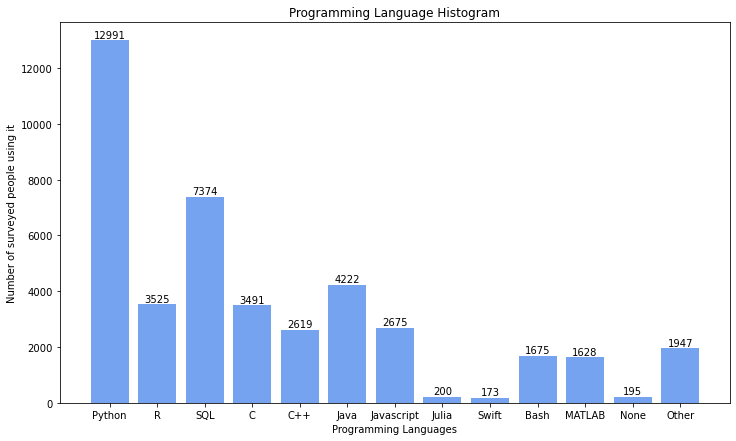

In [71]:
#Observamos la frecuencia de cada lenguaje de programacion.
plt.figure(figsize=(12,7))
plt.bar(languages_2['index'],languages_2['frequency'],color=(0.1, 0.4, 0.9, 0.6))
plt.title('Programming Language Histogram')
plt.xlabel('Programming Languages')
plt.ylabel('Number of surveyed people using it')

x=languages_2['index']
y=languages_2['frequency']
for i in range(len(x)):
    plt.text(i,y[i]+100,y[i],ha = 'center')

#plt.savefig('../graphs/sonia_glob_language_bars.png')
plt.show()

In [21]:
w_python='Python '*12991
w_r='R '*3525
w_sql='SQL '*7374
w_c='C '*3491
w_ccc='C++ '*2619
w_java='Java '*4222
w_javascript='Javascript '*2675
w_julia='Julia '*200
w_swift='Swift '*173
w_bash='Bash '*1675
w_matlab='MATLAB '*1628
w_none='None '*195
w_other='Other '*1947
# Creamos el string con las palabras repitiendolas el numero de veces que estan registradas en el dataframe.
text2=(w_python+w_r+w_sql+w_c+w_ccc+w_java+w_javascript+w_julia+w_swift+w_bash+w_matlab+w_none+w_other)

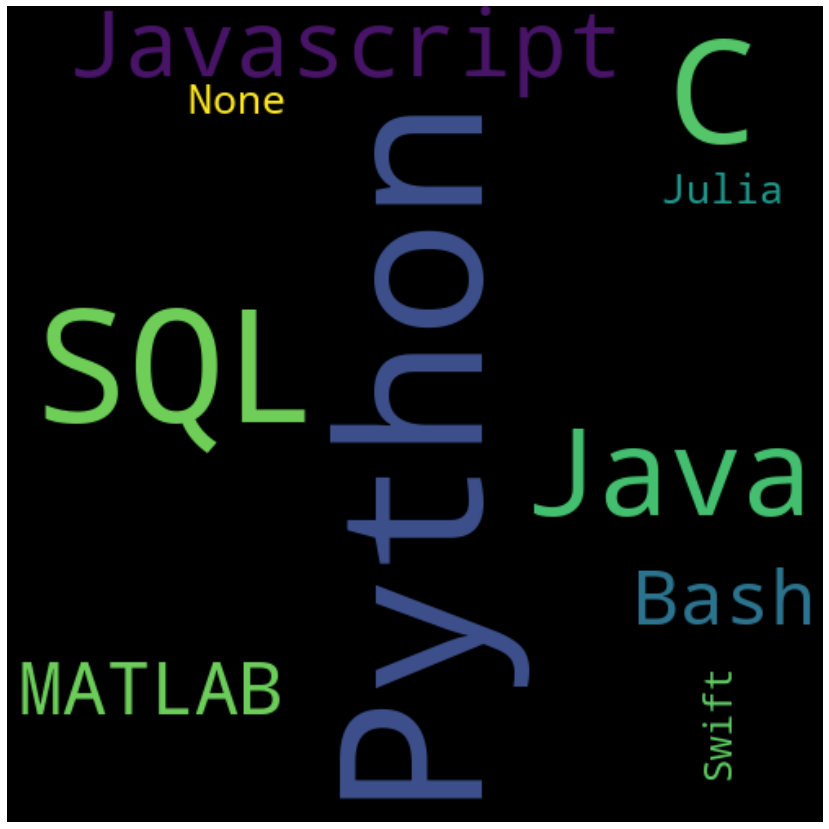

In [22]:
plt.figure(figsize =(15,15))
wordcloud = WordCloud(width=500, height=500, margin=0,relative_scaling=0.5,collocations=False,background_color="darkgrey").generate(text2)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig('../graphs/sonia_glob_language_cloud.png')
plt.show()

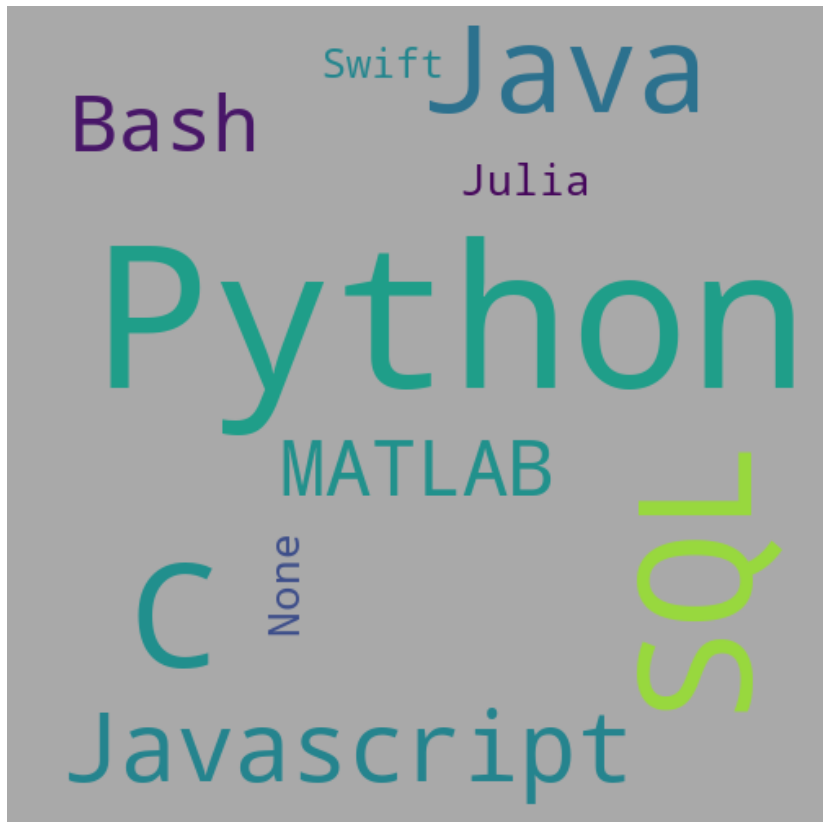

In [30]:
plt.figure(figsize =(15,15))
wordcloud = WordCloud(width=500, height=500, margin=0,relative_scaling=0.5,collocations=False,background_color="darkgrey").generate(text2)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig('../graphs/sonia_glob_language_cloud2.png')
plt.show()

In [139]:
df_glo_contig_leng_cont=pd.crosstab(df_glo['continent'],df_glo['language_q7'])
df_glo_contig_leng_cont

language_q7,Bash,"Bash, MATLAB","Bash, Other",C,C++,"C++, Java","C++, Java, Bash, MATLAB","C++, Java, Javascript","C++, Java, Javascript, Other","C++, Java, Javascript, Swift","C++, Java, MATLAB","C++, Java, Other","C++, Javascript","C++, Javascript, Other","C++, MATLAB","C++, MATLAB, Other","C++, Other","C, Bash","C, Bash, Other","C, C++","C, C++, Bash","C, C++, Java","C, C++, Java, Javascript","C, C++, Java, MATLAB","C, C++, Javascript","C, C++, Javascript, MATLAB","C, C++, MATLAB","C, C++, MATLAB, Other","C, C++, Swift, Bash","C, Java","C, Java, Javascript","C, Java, Other","C, Javascript","C, Javascript, Other","C, MATLAB","C, MATLAB, Other","C, Other",Java,"Java, Bash","Java, Bash, Other","Java, Javascript","Java, Javascript, Bash","Java, Javascript, Other","Java, Javascript, Swift, Other","Java, Julia, Bash, Other","Java, MATLAB","Java, Other",Javascript,"Javascript, Bash","Javascript, MATLAB","Javascript, Other","Javascript, Swift, Other",Julia,"Julia, Bash, Other","Julia, Other","Julia, Swift, MATLAB",MATLAB,"MATLAB, Other",None,Other,R,"R, Bash","R, Bash, MATLAB","R, C","R, C++","R, C++, Bash","R, C++, Java","R, C++, Java, Javascript, MATLAB","R, C++, Javascript","R, C++, MATLAB","R, C++, Other","R, C, Bash, MATLAB","R, C, C++","R, C, C++, Java","R, C, C++, Java, Javascript","R, C, C++, Java, Javascript, MATLAB","R, C, C++, Java, Javascript, Other","R, C, C++, Java, Julia, Other","R, C, C++, MATLAB","R, C, C++, Other","R, C, Java","R, C, Javascript, Other","R, C, Other","R, Java","R, Java, Javascript","R, Java, MATLAB","R, Java, Other","R, Java, Swift","R, Javascript","R, Javascript, Bash","R, Javascript, Other","R, Javascript, Swift, Other","R, Julia","R, MATLAB","R, MATLAB, Other","R, Other","R, SQL","R, SQL, Bash","R, SQL, Bash, MATLAB","R, SQL, C","R, SQL, C++","R, SQL, C++, Java","R, SQL, C++, Javascript, MATLAB","R, SQL, C++, Javascript, MATLAB, Other","R, SQL, C++, Other","R, SQL, C, C++","R, SQL, C, C++, Java, Javascript","R, SQL, C, C++, Java, Javascript, Bash, Other","R, SQL, C, C++, Other","R, SQL, C, Java, Javascript","R, SQL, C, Javascript, Bash","R, SQL, C, MATLAB","R, SQL, Java","R, SQL, Java, Javascript","R, SQL, Java, Javascript, Bash, Other","R, SQL, Javascript","R, SQL, Javascript, Bash","R, SQL, Javascript, Other","R, SQL, Julia, Bash","R, SQL, MATLAB","R, SQL, MATLAB, Other","R, SQL, Other","R, Swift",SQL,"SQL, Bash","SQL, Bash, Other","SQL, C","SQL, C++","SQL, C++, Java","SQL, C++, Java, Bash","SQL, C++, Java, Javascript","SQL, C++, Java, Javascript, MATLAB","SQL, C++, Java, Javascript, Other","SQL, C++, Java, Javascript, Swift","SQL, C++, Java, MATLAB","SQL, C++, Java, Other","SQL, C++, Javascript","SQL, C++, Javascript, MATLAB","SQL, C++, Javascript, MATLAB, Other","SQL, C++, Javascript, Other","SQL, C++, Javascript, Swift, Bash","SQL, C++, Julia, Swift, MATLAB","SQL, C++, MATLAB","SQL, C++, Other","SQL, C, Bash, Other","SQL, C, C++","SQL, C, C++, Java","SQL, C, C++, Java, Bash","SQL, C, C++, Java, Javascript","SQL, C, C++, Java, Javascript, MATLAB","SQL, C, C++, Java, Julia","SQL, C, C++, Java, MATLAB","SQL, C, C++, Java, Other","SQL, C, C++, Javascript","SQL, C, C++, Javascript, Other","SQL, C, C++, MATLAB","SQL, C, C++, MATLAB, Other","SQL, C, C++, Other","SQL, C, Java","SQL, C, Java, Bash","SQL, C, Java, Javascript","SQL, C, Java, Javascript, Bash, Other","SQL, C, Java, Javascript, Other","SQL, C, Java, MATLAB","SQL, C, Java, Swift, Bash","SQL, C, Javascript","SQL, C, Javascript, Bash","SQL, C, Javascript, Other","SQL, C, MATLAB","SQL, C, Other","SQL, Java","SQL, Java, Bash","SQL, Java, Bash, Other","SQL, Java, Javascript","SQL, Java, Javascript, Bash","SQL, Java, Javascript, Bash, Other","SQL, Java, Javascript, MATLAB","SQL, Java, Javascript, MATLAB, Other","SQL, Java, Javascript, Other","SQL, Java, MATLAB","SQL, Java, Other","SQL, Java, Swift","SQL, Javascript","SQL, Javascript, Bash","SQL, Javascript, Bash, Other","SQL, Javascript, MATLAB","SQL, Javascript, Other","SQL, Javascript, Swift

In [ ]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
def chi2(df): 
    chi2 = chi2_contingency(df)
    if chi2[1] <= .05:
        print(f"Existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")
    else:
        print(f"No existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")

In [ ]:
#https://towardsdatascience.com/contingency-tables-chi-squared-and-cramers-v-ada4f93ec3fd
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # effect size data frame for cramer's v function
    data = cross_tabs
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    
    if v <= 0.20:
              return print(f'La relación entre ambas variables es débil, siendo la V de Crammer = {round(v, 3)}')
    elif v <= 0.60:
              return print(f'La relación entre ambas variables es moderada, siendo la V de Crammer = {round(v, 3)}')
    elif v > 0.60:
              return print(f'La relación entre ambas variables es fuerte, siendo la V de Crammer = {round(v, 3)}')
          
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
    print(f'\nEffect Size Thresholds\n{sizes}\n')

In [97]:
import sidetable as stb


In [100]:
df_glo_gender_freq=df_glo.stb.freq(['gender_def'])
df_glo_gender_freq

,gender_def,count,percent,cumulative_count,cumulative_percent
0,Man,13297,82.909340,13297,82.909340
1,Woman,2667,16.629256,15964,99.538596
2,NB,74,0.461404,16038,100.000000


In [89]:
df_glo['gender_def'].unique()

array(['Man', 'Woman', 'NB'], dtype=object)

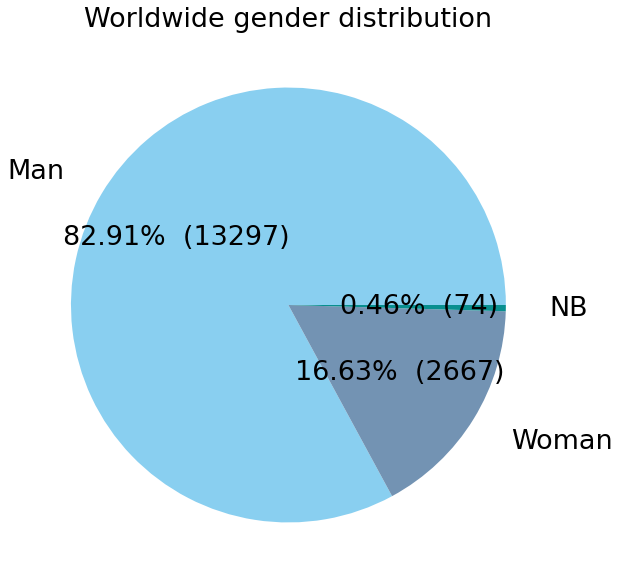

In [115]:
plt.figure(figsize=(15,10))
plt.pie(df_glo_gender_freq['count'],labels=df_glo_gender_freq['gender_def'],labeldistance=1.2,textprops={'fontsize': 27},autopct=make_autopct(df_glo_gender_freq['count']),colors=['#89CFF0','#7393B3','#088F8F'])
plt.title('Worldwide gender distribution',fontsize= 27)
#plt.savefig('../graphs/sonia_mundial_genero.png')
plt.show()

In [119]:
df_glo['age'].unique()

array(['50-54', '22-24', '45-49', '30-34', '40-44', '35-39', '18-21',
       '70+', '25-29', '55-59', '60-69'], dtype=object)

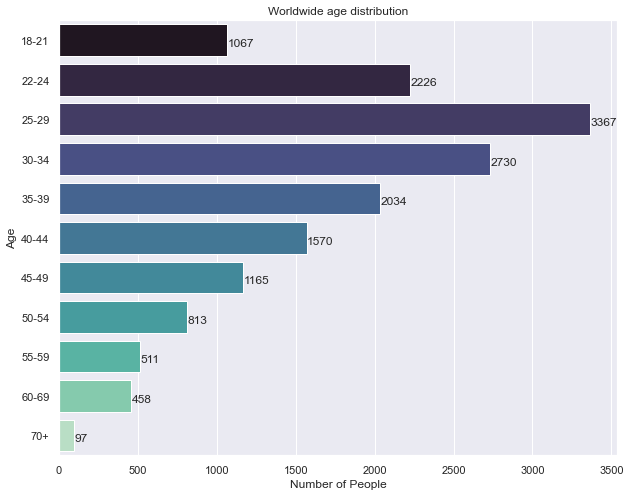

In [140]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
order_age=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-69','70+']
fig=sns.countplot(y='age', data=df_glo,palette='mako',order=order_age)
fig.set(ylabel='Age',xlabel='Number of People')
fig.set_title('Worldwide age distribution')

x=df_glo['age'].value_counts().sort_index()
y=order_age
for i in range(len(order_age)):
    plt.text(x[i]+3,i+0.15,x[i])
#plt.xticks(rotation = 90)
#plt.savefig('../graphs/sonia_ue_age.png')
plt.show()

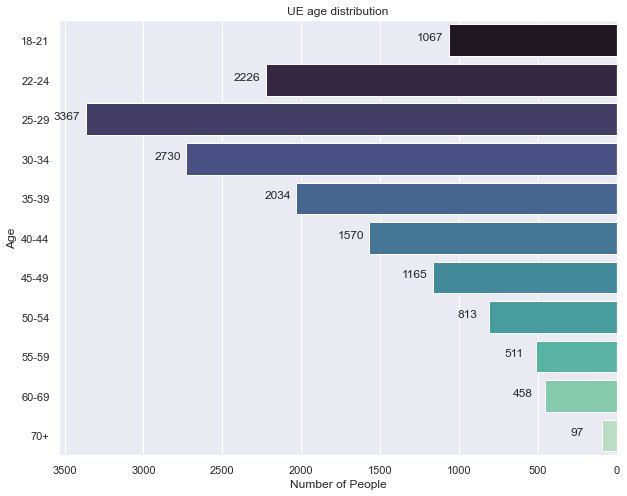

In [148]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
order_age=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-69','70+']
fig=sns.countplot(y='age', data=df_glo,palette='mako',order=order_age)
fig.set(ylabel='Age',xlabel='Number of People')
fig.set_title('UE age distribution')

fig.invert_xaxis()


x=df_glo['age'].value_counts().sort_index()
y=order_age
for i in range(len(order_age)):
    plt.text(x[i]+200,i+0,x[i])
#plt.xticks(rotation = 90)
#plt.savefig('../graphs/sonia_mundial_age.png')
plt.show()

In [158]:
list_income_new = ['23,250-27,899', '55,800-65,099', '0-929,07', '27,900-37,199', np.nan,
                   '13,950-18,599', '65,100-74,399', '1,860-2,789', '9,300-13,949',
                   '4,650-6,974', '18,600-23,249', '930-1,859', '93,000-116,249',
                   '6,975-9,299', '3,720-4,649', '37,200-46,499', '46,500-55,799',
                   '2,790-3,719', '279,000-464,999', '186,000-232,499',
                   '116,250-139,499', '232,500-278,999', '74,400-83,699', '83,700-92,999', '139,500-185,999', '>930,000',
                   '465,000-929,999']

In [159]:
list_income_new2 = ['0-929,07', '930-1,859', '1,860-2,789','2,790-3,719', '3,720-4,649',
                '4,650-6,974','6,975-9,299', '9,300-13,949','13,950-18,599','18,600-23,249',
                '23,250-27,899','27,900-37,199','37,200-46,499','46,500-55,799','55,800-65,099',
                '65,100-74,399', '74,400-83,699','83,700-92,999','93,000-116,249','116,250-139,499',
                '139,500-185,999','186,000-232,499','232,500-278,999','279,000-464,999','465,000-929,999'
                '>930,000']

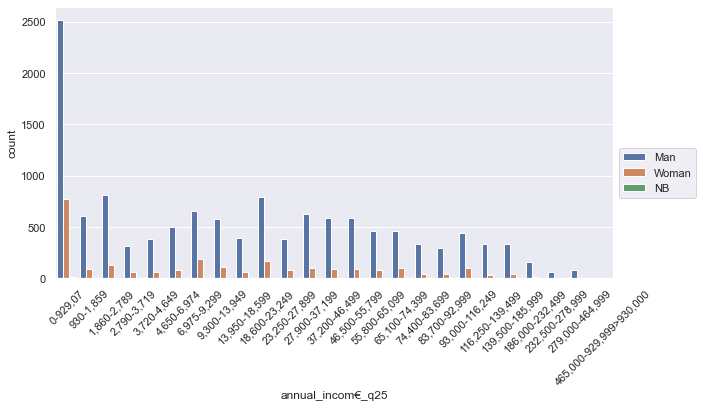

In [160]:
plt.figure(figsize = (10,5))
sns.countplot(data =df_glo, x = "annual_incom€_q25", hue = "gender_def",order=list_income_new2)
plt.xticks(rotation = 45)
plt.legend( bbox_to_anchor=(1, 0.5));

In [163]:
condiciones=[df_glo['annual_incom€_q25']=='0-929,07',
df_glo['annual_incom€_q25']=='930-1,859',df_glo['annual_incom€_q25']=='1,860-2,789',df_glo['annual_incom€_q25']=='2,790-3,719',df_glo['annual_incom€_q25']=='3,720-4,649',df_glo['annual_incom€_q25']=='4,650-6,974',
df_glo['annual_incom€_q25']=='6,975-9,299',df_glo['annual_incom€_q25']== '9,300-13,949',
df_glo['annual_incom€_q25']=='13,950-18,599',df_glo['annual_incom€_q25']=='18,600-23,249',
df_glo['annual_incom€_q25']=='23,250-27,899',df_glo['annual_incom€_q25']=='27,900-37,199',df_glo['annual_incom€_q25']=='37,200-46,499',df_glo['annual_incom€_q25']=='46,500-55,799',
df_glo['annual_incom€_q25']=='55,800-65,099',df_glo['annual_incom€_q25']=='65,100-74,399',df_glo['annual_incom€_q25']== '74,400-83,699',df_glo['annual_incom€_q25']=='83,700-92,999',df_glo['annual_incom€_q25']=='93,000-116,249',
df_glo['annual_incom€_q25']=='116,250-139,499',df_glo['annual_incom€_q25']=='139,500-185,999',df_glo['annual_incom€_q25']=='186,000-232,499',df_glo['annual_incom€_q25']=='232,500-278,999',df_glo['annual_incom€_q25']=='279,000-464,999',
df_glo['annual_incom€_q25']=='465,000-929,999',
df_glo['annual_incom€_q25']=='>930,000']

categorias=['0-930','931-7,000','931-7,000','931-7,000','931-7,000','931-7,000','7001-14,000','7001-14,000','14,001-23,000','14,001-23,000','23,001-55,000','23,001-55,000','23,001-55,000','23,001-55,000','55,001-116,000','55,001-116,000','55,001-116,000','55,001-116,000','55,001-116,000','116,001-460,000','116,001-460,000','116,001-460,000','116,001-460,000','116,001-460,000','460,001-930,000','>930,000']

In [164]:
df_glo['annual_incom€_q25_new']=np.select(condiciones,categorias)

In [168]:
df_glo['annual_incom€_q25'].isnull().sum()

569

In [170]:
df_glo['annual_incom€_q25_new'].value_counts()

0-930              3308
931-7,000          3067
23,001-55,000      2565
55,001-116,000     2389
7001-14,000        1536
14,001-23,000      1427
116,001-460,000    1090
0                   569
>930,000             56
460,001-930,000      31
Name: annual_incom€_q25_new, dtype: int64

In [175]:
df_glo['annual_incom€_q25_new'].replace('0',np.nan,inplace=True)

In [176]:
df_glo['annual_incom€_q25_new'].value_counts()

0-930              3308
931-7,000          3067
23,001-55,000      2565
55,001-116,000     2389
7001-14,000        1536
14,001-23,000      1427
116,001-460,000    1090
>930,000             56
460,001-930,000      31
Name: annual_incom€_q25_new, dtype: int64

In [177]:
df_glo['annual_incom€_q25_new'].isnull().sum()

569

In [179]:
categorias2=['0-930','931-7,000','7001-14,000','14,001-23,000','23,001-55,000','55,001-116,000','116,001-460,000','460,001-930,000','>930,000']

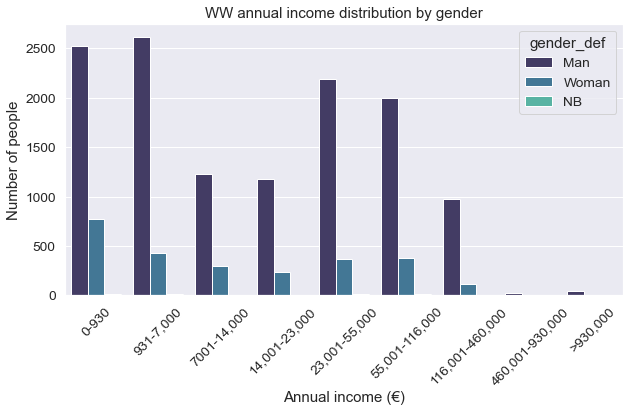

In [188]:
plt.figure(figsize = (10,5))
sns.set(font_scale=1.25)
sns.countplot(data =df_glo, x = "annual_incom€_q25_new", hue = "gender_def",order=categorias2,palette='mako')
plt.xticks(rotation = 45)
#plt.legend( bbox_to_anchor=(1, 0.5))
plt.title('WW annual income distribution by gender')
plt.xlabel('Annual income (€)')
plt.ylabel('Number of people')
#plt.savefig('../graphs/sonia_glob_salary.png')
plt.show()